1. Clone repos and install requirements

In [1]:
import setuptools
setuptools.__version__

'59.5.0'

In [2]:
from taming.models import vqgan # checking correct import from taming

c:\Users\oKata\anaconda3\envs\ldm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


3. Download model checkpoint ( takes ~ 3 Min) and load model


In [3]:
from notebook_helpers import get_model
model = get_model('superresolution')

Using downloaded and verified file: logs\diffusion\superresolution_bsr\configs\project.yaml\dl=1
Using downloaded and verified file: logs\diffusion\superresolution_bsr\checkpoints\last.ckpt\dl=1
Loading model from logs\diffusion\superresolution_bsr\checkpoints\last.ckpt\dl=1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


5. Run Model

In [4]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = 'data/example_conditioning/superresolution/sample_0.jpg'
logs = run(model, cond_choice_path, 'superresolution', custom_steps)

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100
Data shape for DDIM sampling is (1, 3, 256, 256), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [01:57<00:00,  1.17s/it]


Plotting: Restored training weights


6. Display Sample

(1, 1024, 1024, 3)


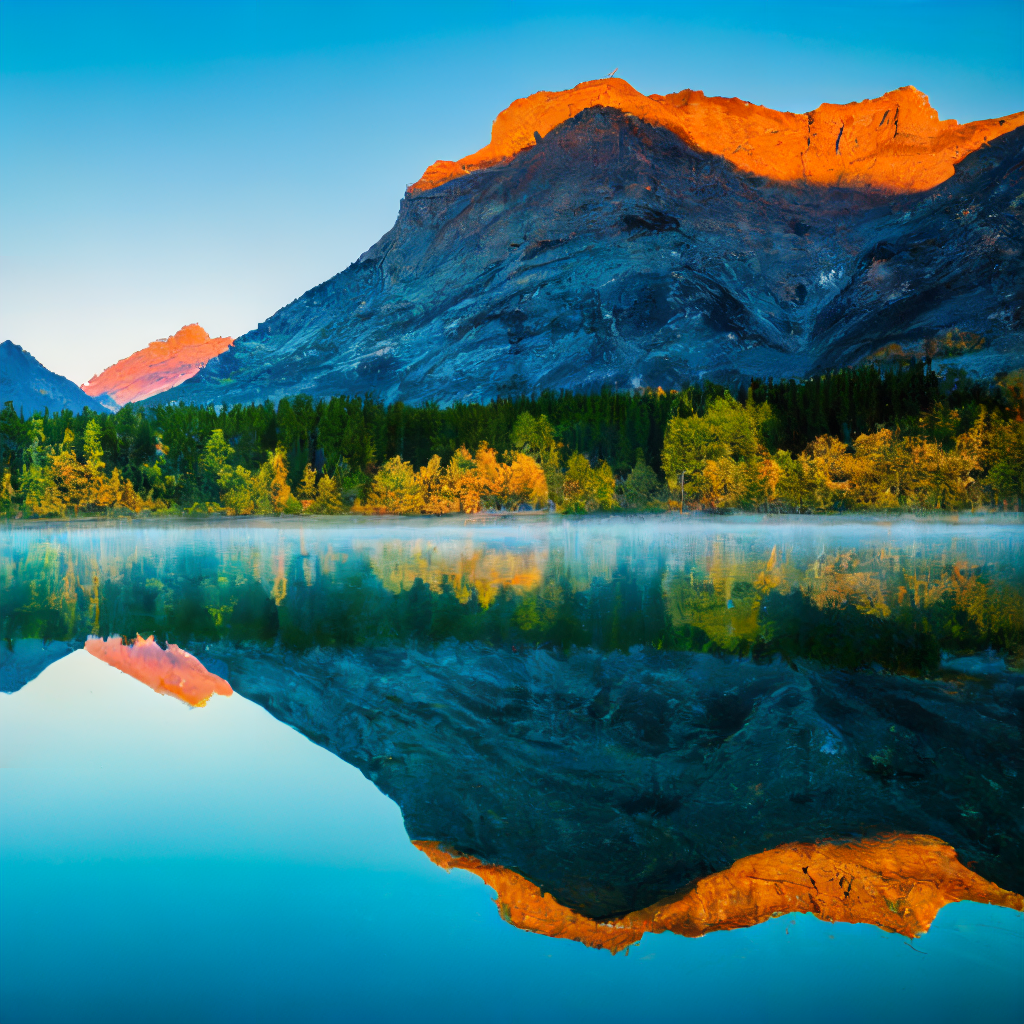

In [5]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
